In [1]:
#新北市各區各類型竊盜案發生次數統計之長條圖(105.4.1-107.3.31)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family = 'Noto Sans CJK TC')

In [2]:
df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=33307&md5_url=73642bf29ddcf1e9ce30b6d7fb2320e7')

In [3]:
df2 = df[df['location'] != '新北市'].copy() #刪去沒有'區'的資料
df2.drop(['date'], axis=1, inplace=True)
df2.columns = ['案件類型', '案發地點']

In [4]:
gp = df2.groupby(by = ['案件類型','案發地點'])
newdf = gp.size()
newdf.reset_index(name='總次數')

,案件類型,案發地點,總次數
0,住宅竊盜,新北市三峽區,6
1,住宅竊盜,新北市三芝區,2
2,住宅竊盜,新北市三重區,134
3,住宅竊盜,新北市中和區,128
4,住宅竊盜,新北市五股區,15
5,住宅竊盜,新北市八里區,8
6,住宅竊盜,新北市土城區,92
7,住宅竊盜,新北市平溪區,1
8,住宅竊盜,新北市新店區,75
9,住宅竊盜,新北市新莊區,92


In [5]:
var = newdf.groupby(['案發地點','案件類型']).sum()
result = var.unstack()
nan = np.isnan(result)
result[nan] = 0

In [6]:
result['總和'] = result['住宅竊盜'] + result['機車竊盜'] + result['汽車竊盜'] + result['自行車竊盜']

In [7]:
result_sort = result.sort_values(by = ['總和'], ascending=False) #計算總和

In [8]:
result_sort

案件類型,住宅竊盜,機車竊盜,汽車竊盜,自行車竊盜,總和
案發地點,,,,,
新北市板橋區,192.0,227.0,37.0,99.0,555.0
新北市三重區,134.0,270.0,64.0,57.0,525.0
新北市中和區,128.0,206.0,31.0,33.0,398.0
新北市新莊區,92.0,173.0,45.0,49.0,359.0
新北市土城區,92.0,72.0,32.0,63.0,259.0
新北市樹林區,50.0,85.0,41.0,22.0,198.0
新北市汐止區,37.0,84.0,42.0,10.0,173.0
新北市蘆洲區,32.0,74.0,22.0,41.0,169.0
新北市永和區,69.0,71.0,10.0,19.0,169.0


In [9]:
result_sort.drop(['總和'], axis=1, inplace=True)

Text(0.5, 1.0, '新北市各區竊盜案統計(105.4.1-107.3.31)')

c:\users\ts105\appdata\local\programs\python\python37\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Noto Sans CJK TC'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 7200x7200 with 0 Axes>

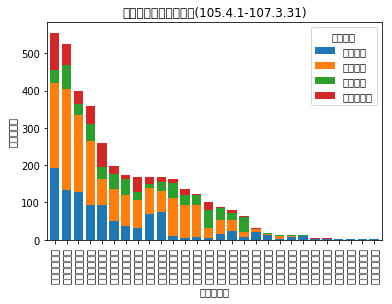

In [10]:
plt.figure(figsize=(100, 100))
result_sort.plot.bar(stacked = True,  width = 0.8)
plt.xlabel('新北市各區')
plt.ylabel('竊盜案件數')
plt.title('新北市各區竊盜案統計(105.4.1-107.3.31)')

Text(0.5, 1.0, '新北市各區竊盜案發生案件數前十名(105.4.1-107.3.31)')

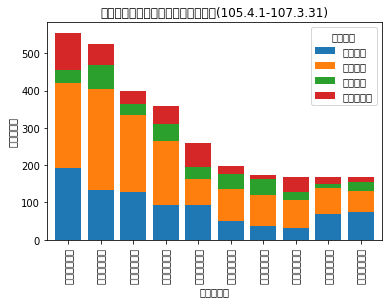

In [11]:
result_sort[:10].plot.bar(stacked = True,  width = 0.8)
plt.xlabel('新北市各區')
plt.ylabel('竊盜案件數')
plt.title('新北市各區竊盜案發生案件數前十名(105.4.1-107.3.31)')